<a href="https://colab.research.google.com/github/janicewee/STB/blob/main/STB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1
Upload the excel spreadsheet into Pandas for preliminary checks

In [1]:
import pandas as pd

# Raw URL to Excel file on GitHub
url = 'https://raw.githubusercontent.com/janicewee/STB/main/data.xlsx'

# Read the Excel file directly from the URL
df = pd.read_excel(url, sheet_name='data')

# Display the first few rows to confirm it loaded
df.head()

# Provide basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22974 entries, 0 to 22973
Data columns (total 51 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   case                                                 22972 non-null  float64
 1   year                                                 22974 non-null  int64  
 2   month                                                22974 non-null  int64  
 3   Country of Residence                                 22974 non-null  object 
 4   City of Residence                                    22962 non-null  object 
 5   Purpose of Visit                                     20641 non-null  object 
 6   Main Purpose of Visit                                22974 non-null  object 
 7   Weights_QTR                                          22974 non-null  float64
 8   Air_Terminal                                         17977 non-nul

# Question 1a Describe the analytical approach you will take and data fields you would look into when it comes to doing exploratory data analysis.
# 1b Highlight the data idiosyncrasies / issues you found in this dataset and how would you address the issues identified.
# 1c What are the considerations that you will take when analysing survey data.

Data Analysis and Issue Detection .
This code can be run on its own as I'll import the necessary libraries and file again.


Shape: (22974, 51)
Columns: ['case', 'year', 'month', 'Country of Residence', 'City of Residence', 'Purpose of Visit', 'Main Purpose of Visit', 'Weights_QTR', 'Air_Terminal', 'Sea_Terminal', 'Land_Terminal', 'First Visit To Singapore', 'Length of Stay', 'Travel Type', 'Gender', 'Marital Status', 'Occupation', 'Occupation.1', 'Other Designation', 'Designation (free text)', 'shopping_fash', 'shopping_jewllery', 'shopping_watches', 'shopping_wellness', 'shopping_food', 'shopping_gifts', 'shopping_consumertech', 'shopping_antiques', 'shopping_others', 'shopping_any', 'totacc', 'totfnb', 'tottran', 'totbiz', 'totedu', 'totmedi', 'tototh', 'totshopping_rep', 'tot.exp', 'c4a_1', 'MainHotel', 'Travel companion - Alone', 'Travel companion - Spouse', 'Travel companion - Your Child/Children', 'Travel companion - Parents/Parents-in-law', 'Travel companion - Grandparents/Grandparents-in-law', 'Travel companion - Siblings', 'Travel companion - Other relatives', 'Travel companion - Friends', 'Travel 

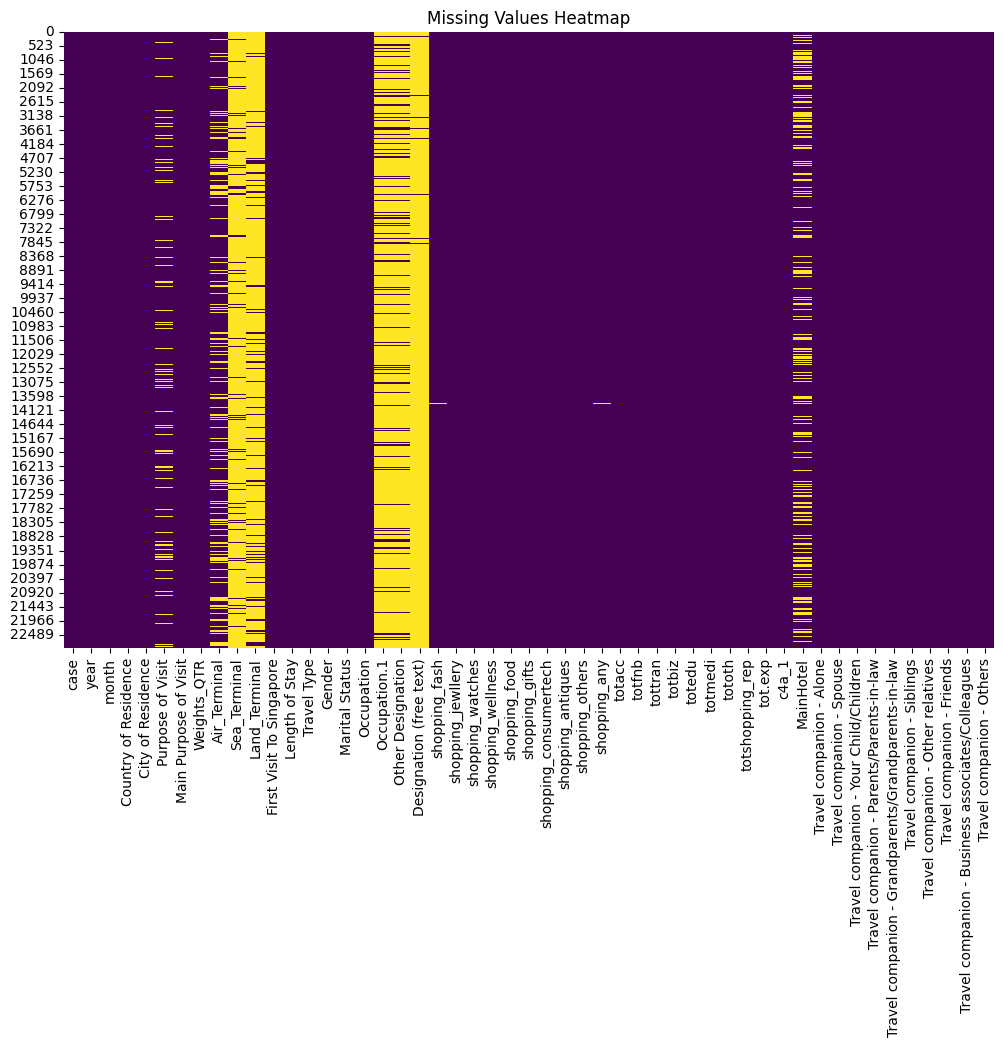

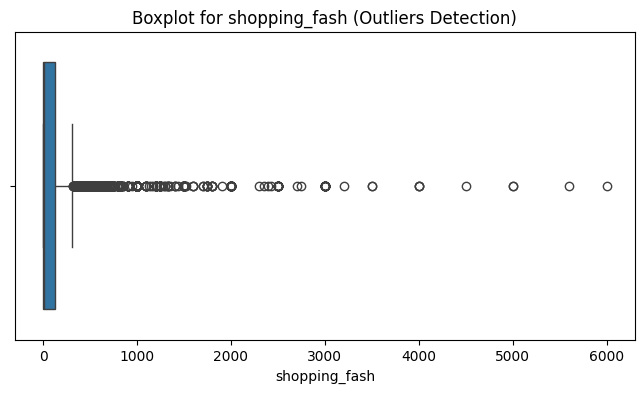

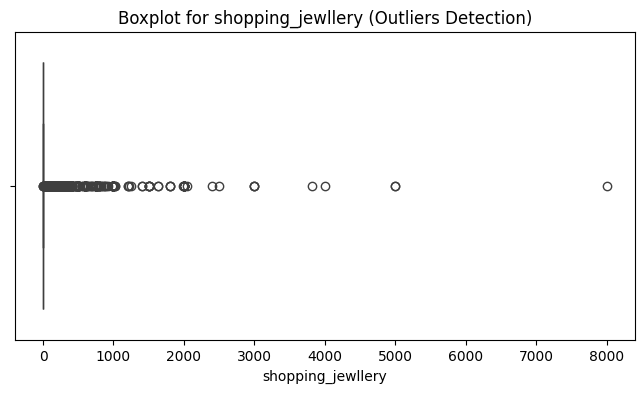

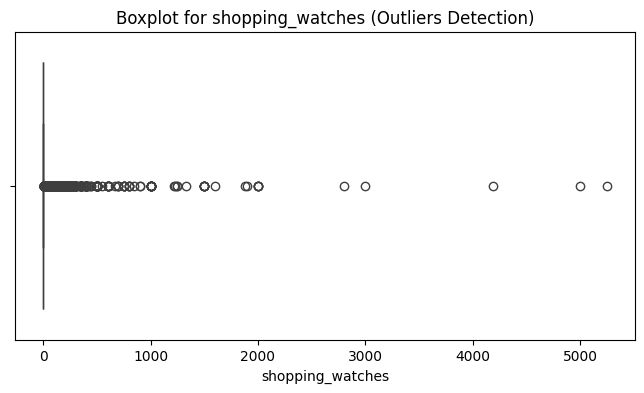

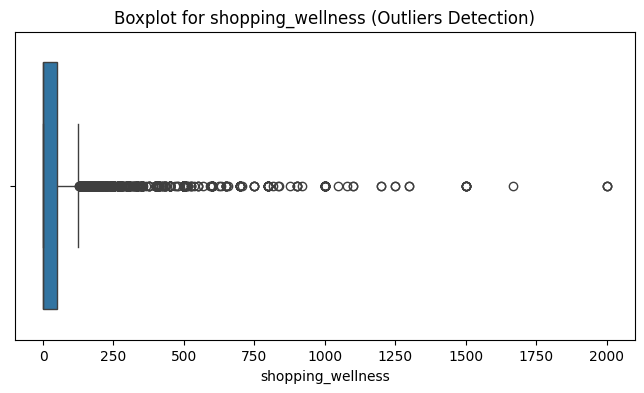

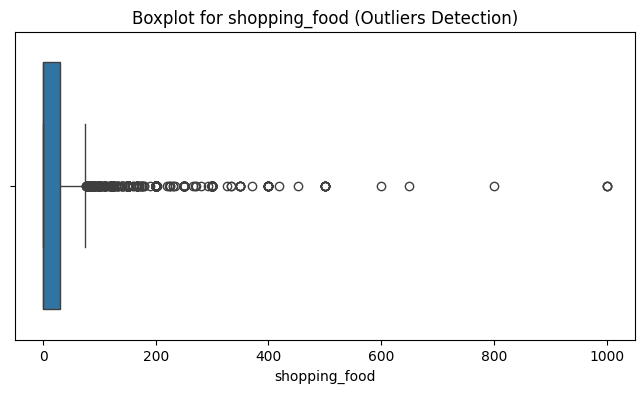

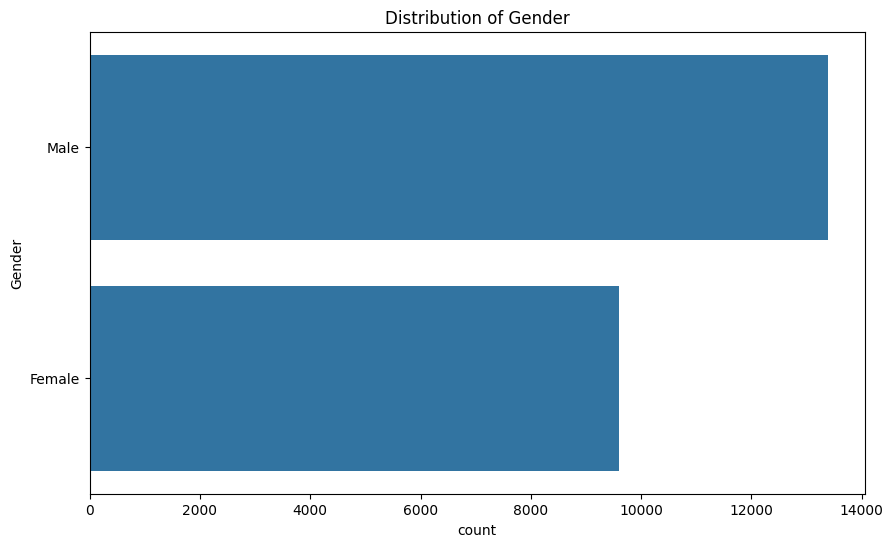

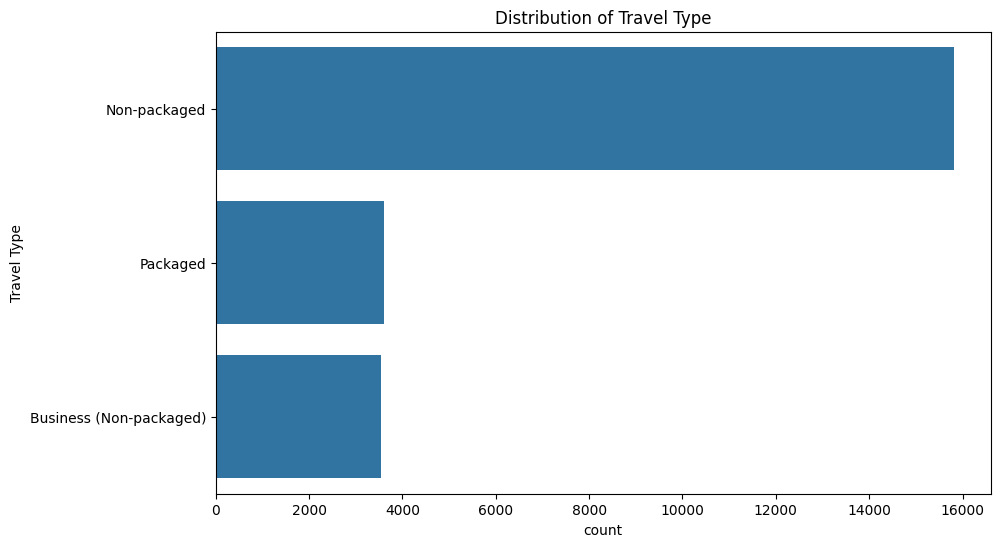

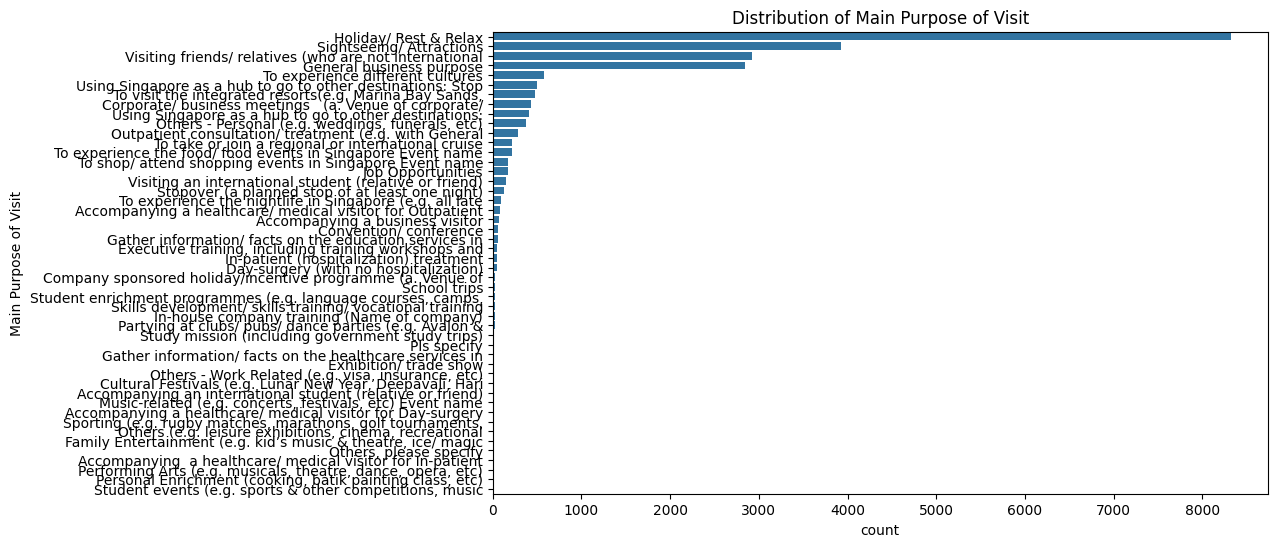


Columns with >90% missing values (will be dropped):
['Designation (free text)']
Number of columns dropped: 1

Shape after dropping high-missing columns: (22974, 50)
Shape after removing duplicates: (22974, 50)

Final cleaned shape: (22974, 50)
Remaining missing values:
 0

Columns kept for analysis: ['case', 'year', 'month', 'Country of Residence', 'City of Residence', 'Purpose of Visit', 'Main Purpose of Visit', 'Weights_QTR', 'Air_Terminal', 'Sea_Terminal', 'Land_Terminal', 'First Visit To Singapore', 'Length of Stay', 'Travel Type', 'Gender', 'Marital Status', 'Occupation', 'Occupation.1', 'Other Designation', 'shopping_fash', 'shopping_jewllery', 'shopping_watches', 'shopping_wellness', 'shopping_food', 'shopping_gifts', 'shopping_consumertech', 'shopping_antiques', 'shopping_others', 'shopping_any', 'totacc', 'totfnb', 'tottran', 'totbiz', 'totedu', 'totmedi', 'tototh', 'totshopping_rep', 'tot.exp', 'c4a_1', 'MainHotel', 'Travel companion - Alone', 'Travel companion - Spouse', 'T

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
url = 'https://raw.githubusercontent.com/janicewee/STB/main/data.xlsx'
df = pd.read_excel(url)  # If multiple sheets, add sheet_name='Sheet1'



# 1. Basic Overview (already provided, but re-run for confirmation)
print('Shape:', df.shape)
print('Columns:', df.columns.tolist())
print('Data Types:\n', df.dtypes)
print('Missing Values:\n', df.isnull().sum())
print('Duplicates:', df.duplicated().sum())

# 2. Summary Statistics (for all columns, including categorical)
print('Summary Statistics:\n', df.describe(include='all'))

# 3. Check Unique Values for Key Categorical/Object Columns
# Selected based on your columns: Gender, Marital Status, Occupation, Travel Type, etc.
categorical_cols = [
    'Country of Residence', 'City of Residence', 'Purpose of Visit', 'Main Purpose of Visit',
    'Sea_Terminal', 'Land_Terminal', 'First Visit To Singapore', 'Travel Type', 'Gender',
    'Marital Status', 'Occupation', 'Occupation.1', 'Other Designation', 'Designation (free text)'
]

for col in categorical_cols:
    if col in df.columns:
        print(f'\nUnique values in {col} (count: {df[col].nunique()}):\n', df[col].value_counts(dropna=False))

# 4. Detect Outliers in Key Numeric/Float Columns
# Focus on float64 and relevant int64: shopping_*, tot*, Length of Stay, etc.
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['year', 'month', 'c4a_1']]  # Exclude non-variable like year/month

for col in numeric_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
        if not outliers.empty:
            print(f'\nOutliers in {col} (count: {len(outliers)}):\n', outliers[[col]].describe())

# 5. Check for Zeros in Float64 Columns - I want to see whether a lot of values in Shopping and Tot are zero
float_cols = df.select_dtypes(include='float64').columns
zero_counts = (df[float_cols] == 0).sum()
zero_counts = zero_counts[zero_counts > 0].sort_values(ascending=False)
print('\nZeros in Float64 Columns:\n', zero_counts)

# 6. Visualizations
# Missing Values Heatmap (useful given high missing in some columns like Sea_Terminal)
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Boxplots for Key Numeric Columns (e.g., shopping and total spends)
key_spend_cols = [col for col in float_cols if 'shopping_' in col or 'tot' in col]
for col in key_spend_cols[:5]:  # Limit to first 5 for brevity; adjust as needed
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col} (Outliers Detection)')
    plt.show()

# Distribution of Categorical (e.g., Gender, Travel Type)
for col in ['Gender', 'Travel Type', 'Main Purpose of Visit']:
    if col in df.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.show()

# 7. Address Issues (Cleaning Steps)
df_clean = df.copy()  # Start with a fresh copy

# Step 1: Identify and drop columns with >90% missing values because I do not want to analyze them
missing_percentage = df_clean.isnull().mean()
high_missing = missing_percentage[missing_percentage > 0.9].index

print('\nColumns with >90% missing values (will be dropped):')
print(high_missing.tolist())
print(f'Number of columns dropped: {len(high_missing)}')

# Drop them permanently
df_clean = df_clean.drop(columns=high_missing)

# Update categorical and numeric column lists to exclude dropped columns
categorical_cols = [col for col in categorical_cols if col in df_clean.columns]
float_cols = df_clean.select_dtypes(include='float64').columns
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()

print(f'\nShape after dropping high-missing columns: {df_clean.shape}')

# Step 2: Drop duplicates (if any)
df_clean = df_clean.drop_duplicates()
print(f'Shape after removing duplicates: {df_clean.shape}')

# Step 3: Handle remaining missing values (only on kept columns)

# - Categorical/object columns: Fill with 'Unknown'
object_cols = df_clean.select_dtypes(include='object').columns
for col in object_cols:
    df_clean[col] = df_clean[col].fillna('Unknown')

# - Numeric columns:
#   For spending-related (shopping_*, tot*), fill with 0 (meaning no spend)
#   For others (e.g., Weights_QTR, Air_Terminal, MainHotel), fill with median
spending_cols = [col for col in df_clean.columns if col.startswith('shopping_') or col.startswith('tot')]
other_numeric_cols = [col for col in numeric_cols if col not in spending_cols]

for col in spending_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(0)

for col in other_numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Step 4: Standardize categorical text (strip spaces, lowercase)
for col in categorical_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str).str.strip().str.lower()

# Step 5: Basic validation and outlier handling (only on remaining numeric columns)
# Ensure non-negative for spend columns
for col in spending_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].clip(lower=0)

# Winsorize extreme outliers (1st and 99th percentile) for spend columns
for col in spending_cols:
    if col in df_clean.columns:
        lower = df_clean[col].quantile(0.01)
        upper = df_clean[col].quantile(0.99)
        df_clean[col] = df_clean[col].clip(lower=lower, upper=upper)

# Final check
print('\nFinal cleaned shape:', df_clean.shape)
print('Remaining missing values:\n', df_clean.isnull().sum().sum())  # Should be 0
print('\nColumns kept for analysis:', df_clean.columns.tolist())

df.info()

Save the cleaned up file as csv for future use

In [3]:
# Export the cleaned DataFrame to CSV
csv_filename = 'cleaned_survey_data.csv'

df_clean.to_csv(csv_filename, index=False)  # index=False to avoid saving row numbers

print(f"Cleaned data saved as {csv_filename}")
print(f"Shape of exported data: {df_clean.shape}")

Cleaned data saved as cleaned_survey_data.csv
Shape of exported data: (22974, 50)


Create a download link

In [4]:
from google.colab import files

# Trigger automatic download to your local computer
files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


# Question 2.1.g Was any feature engineering required? If yes, what were they. If no, why?
Feature Engineering for mode of arrival - land sea or air

Rows with any terminal data: 22974
Rows with NO terminal data (NaN): 0
Rows with multiple terminals (overlap): 22974

Terminal value counts (excluding any 'Unknown'):
Terminal
Air T1 || Sea unknown || Land unknown                   6739
Air T3 || Sea unknown || Land unknown                   6102
Air T2 || Sea unknown || Land unknown                   5137
Air T2 || Sea harbourfront ferry || Land unknown        1213
Air T2 || Sea unknown || Land tuas checkpoint           1134
Air T2 || Sea unknown || Land woodlands checkpoint      1009
Air T2 || Sea tanah merah ferry || Land unknown          649
Air T2 || Sea unknown || Land others, please specify     472
Air T2 || Sea mbccs || Land unknown                      263
Air T2 || Sea harbourfront cruise || Land unknown        256
Name: count, dtype: int64

Percentage distribution (%):
Terminal
Air T1 || Sea unknown || Land unknown                   29.33
Air T3 || Sea unknown || Land unknown                   26.56
Air T2 || Sea unknown || 

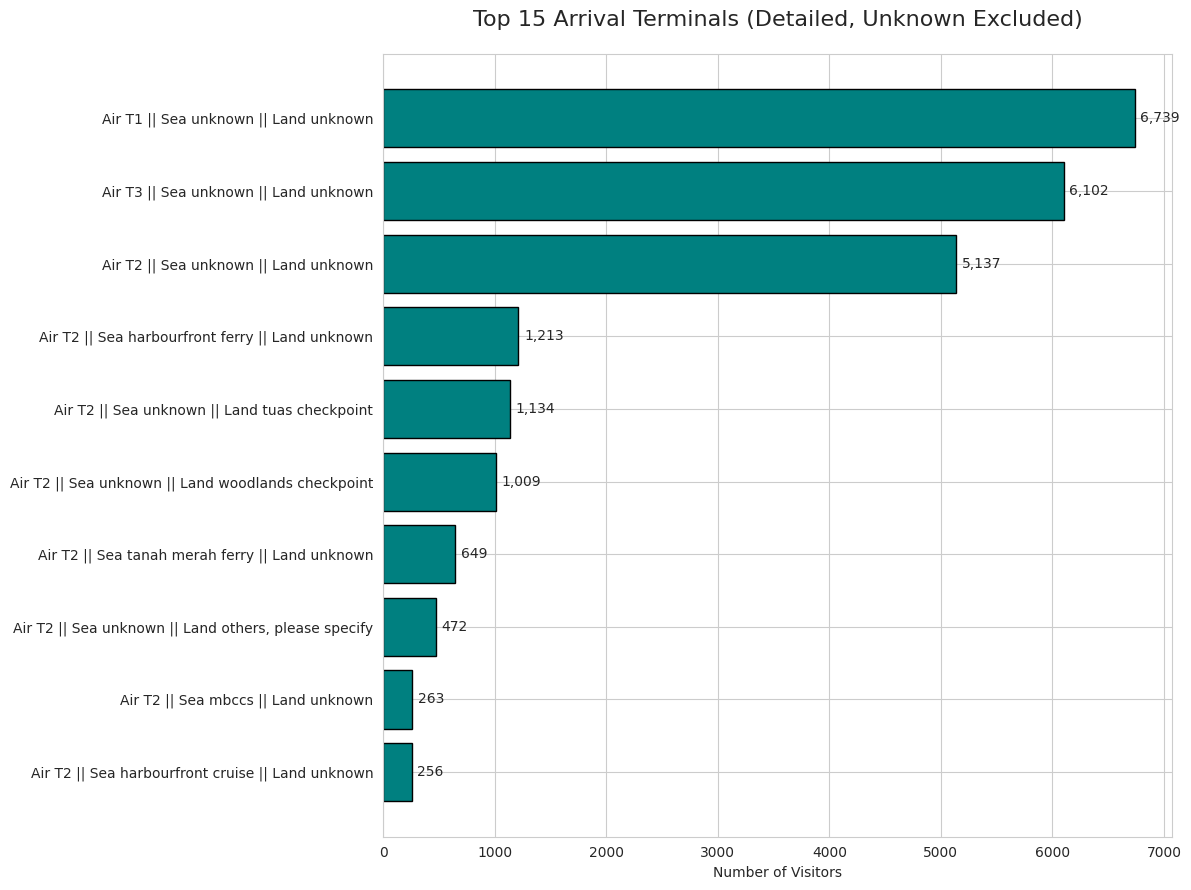

Non-null counts from original columns:
Air_Terminal: 22974
Sea_Terminal: 22974
Land_Terminal: 22974
Overlaps: 22974


In [5]:
import pandas as pd
import numpy as np

# Improved Terminal feature engineering: Append on overlap, NO "Unknown" fallback

# Helper functions to format each terminal type
def format_air(code):
    if pd.isna(code):
        return None
    try:
        code = int(code)
        air_map = {1: 'Air T1', 2: 'Air T2', 3: 'Air T3', 4: 'Air T4'}
        return air_map.get(code, f'Air Other ({code})')
    except:
        return f'Air Other ({code})'

def format_sea(value):
    if pd.isna(value) or str(value).strip().lower() in ['', 'nan']:
        return None
    return 'Sea ' + str(value).strip()

def format_land(value):
    if pd.isna(value) or str(value).strip().lower() in ['', 'nan']:
        return None
    return 'Land ' + str(value).strip()

# Apply formatting
air_part = df_clean['Air_Terminal'].apply(format_air)
sea_part = df_clean['Sea_Terminal'].apply(format_sea)
land_part = df_clean['Land_Terminal'].apply(format_land)

# Combine into DataFrame
terminal_parts = pd.DataFrame({
    'air': air_part,
    'sea': sea_part,
    'land': land_part
})

# Join only the parts that exist — if none exist, result will be empty string
df_clean['Terminal'] = terminal_parts.apply(
    lambda row: ' || '.join([part for part in row if part is not None]),
    axis=1
)

# Crucial: Replace empty strings with NaN (no "Unknown" label)
df_clean['Terminal'] = df_clean['Terminal'].replace('', np.nan)

# Optional: Drop rows where Terminal is NaN (no arrival terminal data at all)
# Uncomment the next line if you want to remove those rows entirely
# df_clean = df_clean.dropna(subset=['Terminal'])

# Check results
print("Rows with any terminal data:", df_clean['Terminal'].notna().sum())
print("Rows with NO terminal data (NaN):", df_clean['Terminal'].isna().sum())

overlap_count = df_clean['Terminal'].str.contains(r' \|\| ', na=False).sum()
print(f"Rows with multiple terminals (overlap): {overlap_count}")

print("\nTerminal value counts (excluding any 'Unknown'):")
print(df_clean['Terminal'].value_counts(dropna=True).head(20))

print("\nPercentage distribution (%):")
print(df_clean['Terminal'].value_counts(normalize=True, dropna=True).round(4) * 100)

# Create clean primary terminal for visualization
df_clean['Terminal_Main'] = df_clean['Terminal'].str.split(r' \|\| ').str[0]

# Visualization: Top detailed terminals (only rows with data)
top_n = 15
top_terminals = df_clean['Terminal'].value_counts().head(top_n)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(12, 9))
bars = plt.barh(range(len(top_terminals)), top_terminals.values, color='teal', edgecolor='black')
plt.yticks(range(len(top_terminals)), top_terminals.index)
plt.gca().invert_yaxis()
plt.title(f'Top {top_n} Arrival Terminals (Detailed, Unknown Excluded)', fontsize=16, pad=20)
plt.xlabel('Number of Visitors')

for i, bar in enumerate(bars):
    width = int(bar.get_width())
    plt.text(width + 50, bar.get_y() + bar.get_height()/2,
             f'{width:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("Non-null counts from original columns:")
print("Air_Terminal:", df_clean['Air_Terminal'].notna().sum())
print("Sea_Terminal:", df_clean['Sea_Terminal'].notna().sum())
print("Land_Terminal:", df_clean['Land_Terminal'].notna().sum())
print("Overlaps:", df_clean[['Air_Terminal','Sea_Terminal','Land_Terminal']].notna().sum(axis=1)[lambda x: x > 1].count())

Check the dataframe now

In [6]:
# Display the first few rows to confirm it loaded
df.head()

# Provide basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22974 entries, 0 to 22973
Data columns (total 51 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   case                                                 22972 non-null  float64
 1   year                                                 22974 non-null  int64  
 2   month                                                22974 non-null  int64  
 3   Country of Residence                                 22974 non-null  object 
 4   City of Residence                                    22962 non-null  object 
 5   Purpose of Visit                                     20641 non-null  object 
 6   Main Purpose of Visit                                22974 non-null  object 
 7   Weights_QTR                                          22974 non-null  float64
 8   Air_Terminal                                         17977 non-nul

# Question 2.1.e What were the other approaches you considered? Please explain the reason for the technique / approach used as well as the pros and cons.
See the breakdown of expenditure by each category for further insights

In [7]:
import pandas as pd

# look at the cleaned up dataframe
df = df_clean

# Identify categorical columns (object dtype + known categorical numeric columns)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Add known categorical numeric/binary columns (e.g., travel companions are 0/1 flags)
additional_categorical = [
    'c4a_1',
    'Travel companion - Alone',
    'Travel companion - Spouse',
    'Travel companion - Your Child/Children',
    'Travel companion - Parents/Parents-in-law',
    'Travel companion - Grandparents/Grandparents-in-law',
    'Travel companion - Siblings',
    'Travel companion - Other relatives',
    'Travel companion - Friends',
    'Travel companion - Business associates/Colleagues',
    'Travel companion - Others'
]

# Combine and dedupe
all_categorical = list(set(categorical_columns + additional_categorical))

print(f"Analyzing {len(all_categorical)} categorical columns...\n")
print("="*80)

# Loop through each categorical column
for col in all_categorical:
    if col in df.columns:
        print(f"\nColumn: {col}")
        print(f"Unique values: {df[col].nunique()}")
        print(f"Missing values: {df[col].isna().sum()}")

        # Group by the column and compute count and sum of total expenditure
        summary = df.groupby(col, dropna=False)['tot.exp'].agg(
            count='count',
            total_expenditure='sum'
        ).round(2)

        # Sort by count descending
        summary = summary.sort_values('count', ascending=False)

        # Optional: Add average expenditure
        summary['avg_expenditure'] = (summary['total_expenditure'] / summary['count']).round(2)

        # Rename NaN to 'Missing' for readability
        summary.index = summary.index.fillna('Missing')

        # Display top 20 (adjust as needed)
        print(summary.head(20))

        print("-" * 60)
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

Analyzing 26 categorical columns...


Column: Travel companion - Others
Unique values: 2
Missing values: 0
                           count  total_expenditure  avg_expenditure
Travel companion - Others                                           
0                          22740        20750030.82           912.49
1                            234          141112.54           603.05
------------------------------------------------------------

Column: City of Residence
Unique values: 1015
Missing values: 0
                   count  total_expenditure  avg_expenditure
City of Residence                                           
jakarta             2055         1802126.06           876.95
kuala lumpur         883          475969.29           539.04
hong kong            832          628124.48           754.96
batam/batu besar     823          275088.56           334.25
tokyo                803          809612.56          1008.23
manila               731          676403.03           925.31
seo

# Question 2.1
Prepare the Terminal Type for Clustering

In [8]:
# =============================================
# Create accurate Terminal_Type (Air / Sea / Land / Multiple) - PERMANENT
# =============================================

def get_terminal_type_corrected(row):
    types = []
    if pd.notna(row['Air_Terminal']):
        types.append('Air')
    if pd.notna(row['Sea_Terminal']):
        types.append('Sea')
    if pd.notna(row['Land_Terminal']):
        types.append('Land')

    if not types:
        return 'Unknown'
    elif len(types) > 1:
        return 'Multiple'
    else:
        return types[0]

# Apply and save permanently to df_clean
df_clean['Terminal_Type'] = df_clean.apply(get_terminal_type_corrected, axis=1)

# Quick check
print("Terminal_Type distribution:")
print(df_clean['Terminal_Type'].value_counts())


Terminal_Type distribution:
Terminal_Type
Multiple    22974
Name: count, dtype: int64


In [9]:
# Provide basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22974 entries, 0 to 22973
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   case                                                 22974 non-null  float64
 1   year                                                 22974 non-null  int64  
 2   month                                                22974 non-null  int64  
 3   Country of Residence                                 22974 non-null  object 
 4   City of Residence                                    22974 non-null  object 
 5   Purpose of Visit                                     22974 non-null  object 
 6   Main Purpose of Visit                                22974 non-null  object 
 7   Weights_QTR                                          22974 non-null  float64
 8   Air_Terminal                                         22974 non-nul

# Question 2.1.a&b: K-Means clustering to identify Segments

Rows used for clustering: 22,974
Numeric features: 11
Categorical features: 10

=== 7 VISITOR SEGMENTS FOR MARKETING FOCUS ===
 Cluster  tot.exp_count  tot.exp_mean  tot.exp_sum  Length of Stay_mean  totshopping_rep_mean  totacc_mean Main Purpose of Visit_<lambda> Country_Group_<lambda> First Visit To Singapore_<lambda> Terminal_Type_<lambda>  Travels_Alone_mean  With_Children_mean  Party_Size_mean
       4          11624         531.4    6177214.7                  2.8                 197.3        191.4          holiday/ rest & relax              indonesia                                no               Multiple                 0.3                 0.0              0.9
       2           2791        1761.1    4915276.6                  2.8                 282.4        946.6       general business purpose                  Other                                no               Multiple                 0.6                 0.0              1.0
       3           3705        1126.4    4173260

/tmp/ipython-input-994482095.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Cluster', y='tot.exp', order=spend_order, errorbar=None, ax=ax2, palette='viridis')


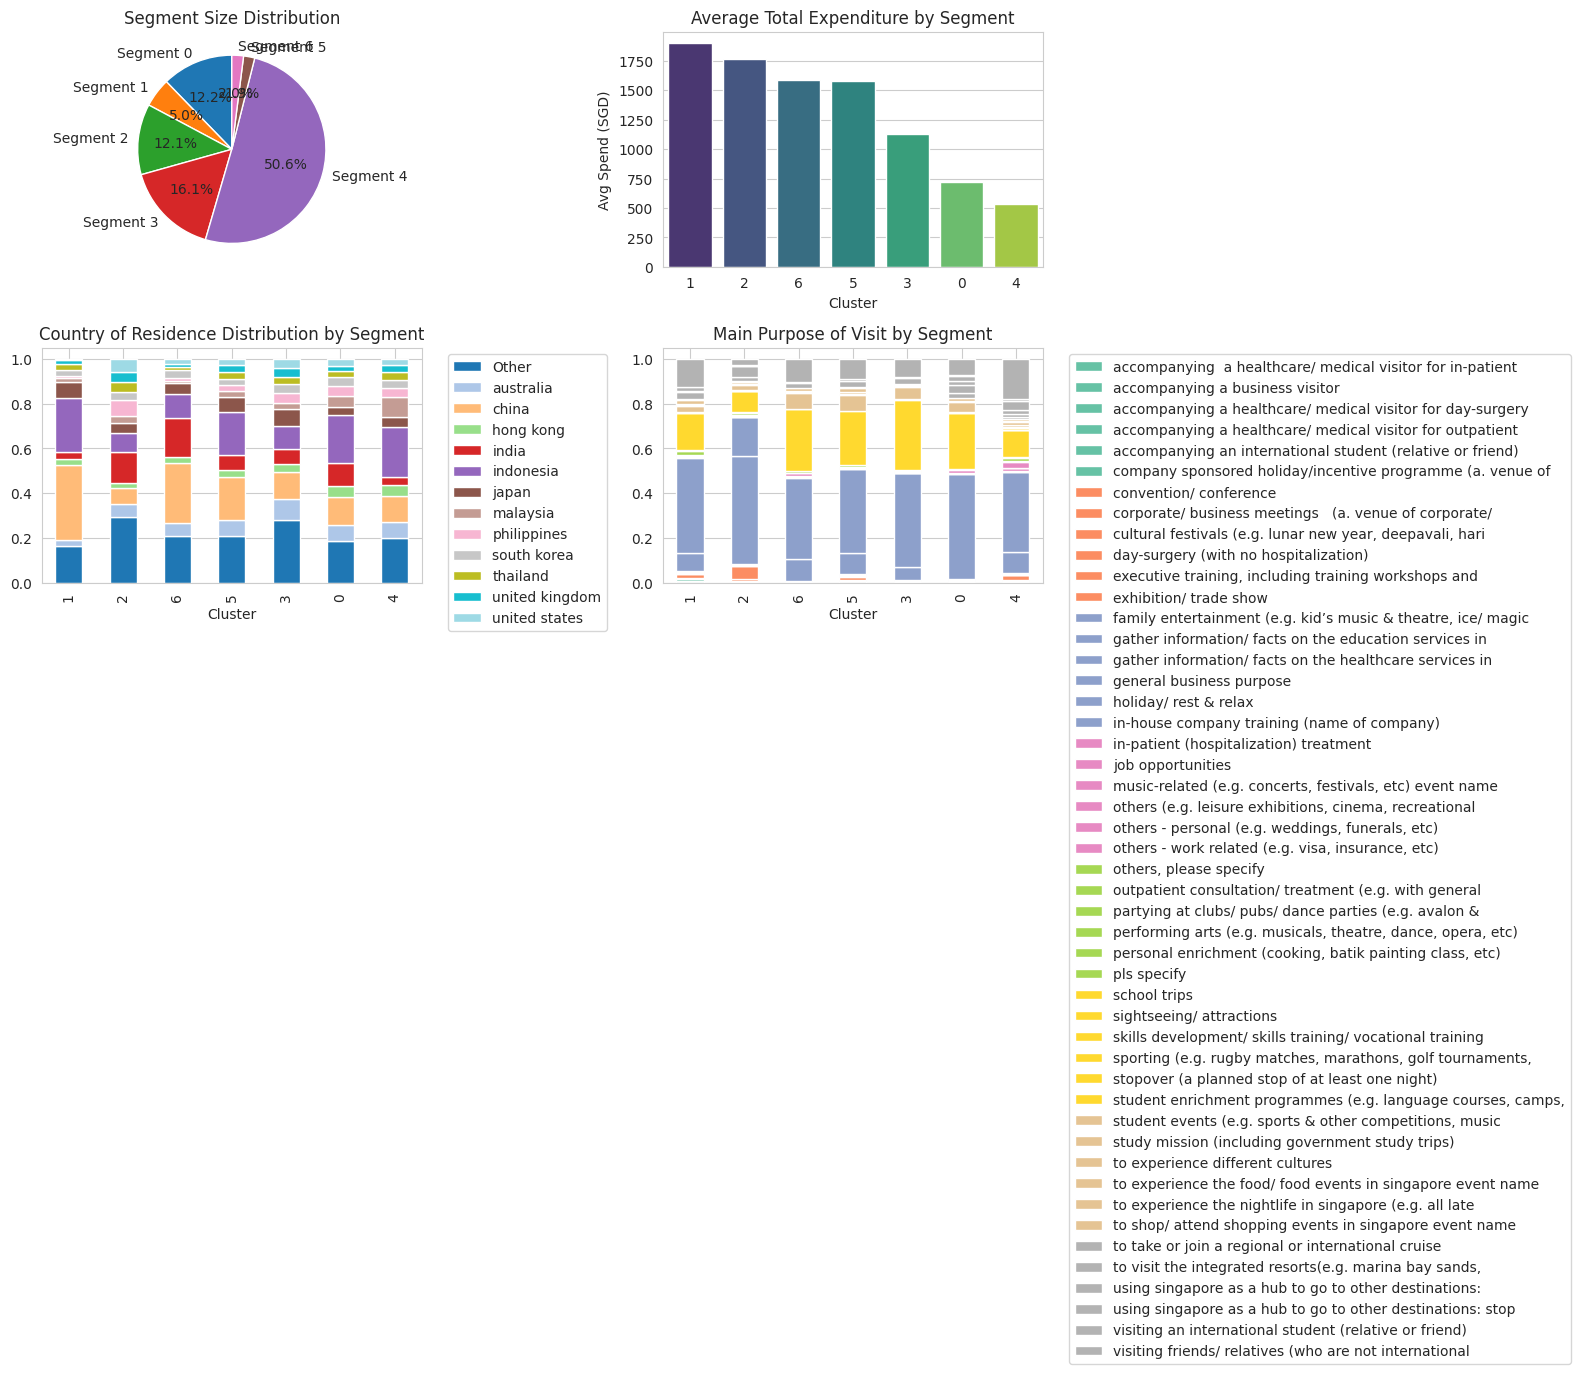


RECOMMENDED MARKETING SEGMENTS & STRATEGIES

Repeat Leisure Visitors (Segment 4)
   • Size: 11,624 visitors (50.6%)
   • Avg Spend: $531
   • Top Origin: indonesia
   • Main Purpose: holiday/ rest & relax
   → Marketing Focus: Tailored campaigns, partnerships, promotions to increase arrivals & spending

Business Travelers (Segment 2)
   • Size: 2,791 visitors (12.1%)
   • Avg Spend: $1,761
   • Top Origin: Other
   • Main Purpose: general business purpose
   → Marketing Focus: Tailored campaigns, partnerships, promotions to increase arrivals & spending

Budget Solo Explorers (Segment 3)
   • Size: 3,705 visitors (16.1%)
   • Avg Spend: $1,126
   • Top Origin: Other
   • Main Purpose: holiday/ rest & relax
   → Marketing Focus: Tailored campaigns, partnerships, promotions to increase arrivals & spending

Family Holidaymakers (Segment 1)
   • Size: 1,141 visitors (5.0%)
   • Avg Spend: $1,902
   • Top Origin: china
   • Main Purpose: holiday/ rest & relax
   → Marketing Focus: Tailored 

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# =============================================
# 1. Prepare data for clustering
# =============================================

df = df_clean.copy()  # Make sure we're working on the cleaned df

# --- Numeric features (behavioral & spending - most important for marketing) ---
numeric_features = [
    'tot.exp',                  # Total expenditure - primary target
    'Length of Stay',           # Longer stay = more spend opportunity
    'totacc',                   # Accommodation spend
    'totfnb',                   # Food & beverage
    'totshopping_rep',          # Reported shopping spend
    'tottran',                  # Transport
    'shopping_fash',            # Fashion shopping
    'shopping_jewllery',        # Jewellery
    'shopping_watches',         # Watches
    'shopping_gifts'            # Gifts/souvenirs
]

# --- Categorical features (demographic & trip profile) ---
categorical_features = [
    'Country of Residence',     # Key for geographic targeting
    'Main Purpose of Visit',    # Leisure vs Business vs VFR
    'First Visit To Singapore', # First-timer vs Repeat
    'Gender',
    'Marital Status',
    'Travel Type',              # Package vs Independent
    'Terminal_Type'             # Air / Sea / Land / Multiple (already accurate)
]

# --- Derived behavioral features ---
# Party composition
companion_cols = [
    'Travel companion - Alone',
    'Travel companion - Spouse',
    'Travel companion - Your Child/Children',
    'Travel companion - Parents/Parents-in-law',
    'Travel companion - Siblings',
    'Travel companion - Friends',
    'Travel companion - Business associates/Colleagues'
]

df['Party_Size'] = df[companion_cols].sum(axis=1)
df['Travels_Alone'] = (df['Travel companion - Alone'] == 1).astype(int)
df['With_Children'] = (df['Travel companion - Your Child/Children'] == 1).astype(int)
df['With_Spouse'] = (df['Travel companion - Spouse'] == 1).astype(int)

numeric_features += ['Party_Size']
categorical_features += ['Travels_Alone', 'With_Children', 'With_Spouse']

# Reduce Country cardinality (avoid too many dummy variables)
top_countries = 12
top_country_list = df['Country of Residence'].value_counts().head(top_countries).index
df['Country_Group'] = df['Country of Residence'].where(
    df['Country of Residence'].isin(top_country_list), 'Other'
)
categorical_features.remove('Country of Residence')
categorical_features.append('Country_Group')

# Final clustering dataset
cluster_df = df[numeric_features + categorical_features].copy()

print(f"Rows used for clustering: {len(cluster_df):,}")
print(f"Numeric features: {len(numeric_features)}")
print(f"Categorical features: {len(categorical_features)}")

# =============================================
# 2. Preprocessing & K-Means (k=7)
# =============================================

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

kmeans = KMeans(n_clusters=7, n_init=20, random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', kmeans)
])

# Fit
pipeline.fit(cluster_df)

# Assign clusters back to original dataframe
df['Cluster'] = pipeline.named_steps['kmeans'].labels_

# =============================================
# 3. Segment Summary Table
# =============================================

profile = df.groupby('Cluster').agg({
    'tot.exp': ['count', 'mean', 'sum'],
    'Length of Stay': 'mean',
    'totshopping_rep': 'mean',
    'totacc': 'mean',
    'Main Purpose of Visit': lambda x: x.value_counts().index[0],
    'Country_Group': lambda x: x.value_counts().index[0],
    'First Visit To Singapore': lambda x: x.value_counts().index[0],
    'Terminal_Type': lambda x: x.value_counts().index[0],
    'Travels_Alone': 'mean',
    'With_Children': 'mean',
    'Party_Size': 'mean'
}).round(1)

profile.columns = ['_'.join(col).rstrip('_') for col in profile.columns.values]
profile = profile.reset_index()

# Sort by total expenditure descending (most valuable first)
profile = profile.sort_values('tot.exp_sum', ascending=False)

print("\n=== 7 VISITOR SEGMENTS FOR MARKETING FOCUS ===")
print(profile.to_string(index=False))

# =============================================
# 4. Visualizations
# =============================================

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Segment size
sizes = df['Cluster'].value_counts().sort_index()
ax1.pie(sizes.values, labels=[f'Segment {i}' for i in sizes.index], autopct='%1.1f%%', startangle=90)
ax1.set_title('Segment Size Distribution')

# 2. Average total spend
spend_order = df.groupby('Cluster')['tot.exp'].mean().sort_values(ascending=False).index
sns.barplot(data=df, x='Cluster', y='tot.exp', order=spend_order, errorbar=None, ax=ax2, palette='viridis')
ax2.set_title('Average Total Expenditure by Segment')
ax2.set_ylabel('Avg Spend (SGD)')

# 3. Top country per segment
country_pivot = df.pivot_table(index='Cluster', columns='Country_Group', aggfunc='size', fill_value=0)
country_pivot = country_pivot.div(country_pivot.sum(axis=1), axis=0)
country_pivot.loc[spend_order].plot(kind='bar', stacked=True, ax=ax3, cmap='tab20')
ax3.set_title('Country of Residence Distribution by Segment')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 4. Purpose of visit
purpose_pivot = df.pivot_table(index='Cluster', columns='Main Purpose of Visit', aggfunc='size', fill_value=0)
purpose_pivot = purpose_pivot.div(purpose_pivot.sum(axis=1), axis=0)
purpose_pivot.loc[spend_order].plot(kind='bar', stacked=True, ax=ax4, cmap='Set2')
ax4.set_title('Main Purpose of Visit by Segment')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# =============================================
# 5. Suggested Segment Names & Marketing Recommendations
# =============================================

print("\n" + "="*70)
print("RECOMMENDED MARKETING SEGMENTS & STRATEGIES")
print("="*70)

segment_names = {
    0: "High-Value Luxury Shoppers",
    1: "Family Holidaymakers",
    2: "Business Travelers",
    3: "Budget Solo Explorers",
    4: "Repeat Leisure Visitors",
    5: "First-Time Cultural Seekers",
    6: "Regional Short-Stay Shoppers"
}

for cluster_num in profile['Cluster']:
    size = profile.loc[profile['Cluster'] == cluster_num, 'tot.exp_count'].values[0]
    avg_spend = profile.loc[profile['Cluster'] == cluster_num, 'tot.exp_mean'].values[0]
    top_country = profile.loc[profile['Cluster'] == cluster_num, 'Country_Group_<lambda>'].values[0]
    top_purpose = profile.loc[profile['Cluster'] == cluster_num, 'Main Purpose of Visit_<lambda>'].values[0]

    name = segment_names.get(cluster_num, f"Segment {cluster_num}")

    print(f"\n{name} (Segment {cluster_num})")
    print(f"   • Size: {size:,} visitors ({size/len(df)*100:.1f}%)")
    print(f"   • Avg Spend: ${avg_spend:,.0f}")
    print(f"   • Top Origin: {top_country}")
    print(f"   • Main Purpose: {top_purpose}")
    print(f"   → Marketing Focus: Tailored campaigns, partnerships, promotions to increase arrivals & spending")